In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data import GetReports, CreateReportDataframes

MReports, NReports, PReports = GetReports()

dfMResult, dfMMemory, dfMOptimizations = CreateReportDataframes(MReports)
dfNResult, dfNMemory, dfNOptimizations = CreateReportDataframes(NReports)
dfPResult, dfPMemory, dfPOptimizations = CreateReportDataframes(PReports)

In [30]:
zcu104 = {
    "LUT": 230400,
    "BRAM": 312,
    "FF": 460800,
    "URAM": 96,
    "DSP": 1728,
}

In [31]:
dfMResult["BRAM%"] = dfMResult["BRAM"] / zcu104["BRAM"] * 100
dfMResult["DSP%"] = dfMResult["DSP"] / zcu104["DSP"] * 100
dfMResult["FF%"] = dfMResult["FF"] / zcu104["FF"] * 100
dfMResult["LUT%"] = dfMResult["LUT"] / zcu104["LUT"] * 100
dfMResult["URAM%"] = dfMResult["URAM"] / zcu104["URAM"] * 100

In [32]:
dfNResult["BRAM%"] = dfNResult["BRAM"] / zcu104["BRAM"] * 100
dfNResult["DSP%"] = dfNResult["DSP"] / zcu104["DSP"] * 100
dfNResult["FF%"] = dfNResult["FF"] / zcu104["FF"] * 100
dfNResult["LUT%"] = dfNResult["LUT"] / zcu104["LUT"] * 100
dfNResult["URAM%"] = dfNResult["URAM"] / zcu104["URAM"] * 100

In [33]:
dfPResult["BRAM%"] = dfPResult["BRAM"] / zcu104["BRAM"] * 100
dfPResult["DSP%"] = dfPResult["DSP"] / zcu104["DSP"] * 100
dfPResult["FF%"] = dfPResult["FF"] / zcu104["FF"] * 100
dfPResult["LUT%"] = dfPResult["LUT"] / zcu104["LUT"] * 100
dfPResult["URAM%"] = dfPResult["URAM"] / zcu104["URAM"] * 100

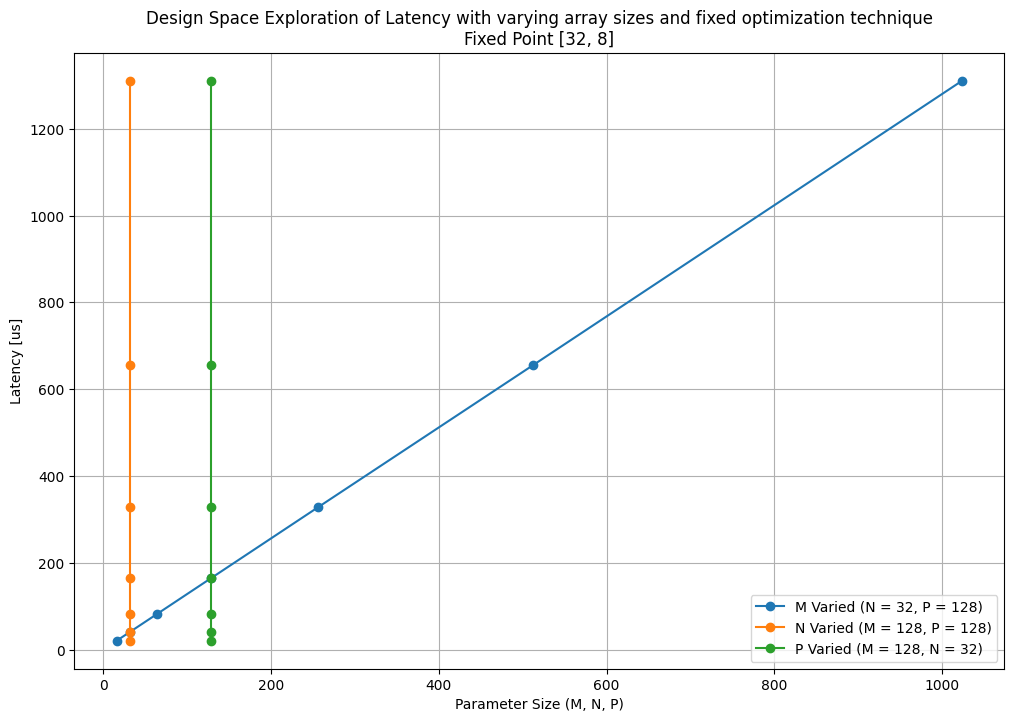

In [34]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handle_M, = ax.plot(dfMResult["M"], dfMResult["Latency_ns"] / 1000, marker="o", label="M Varied (N = 32, P = 128)")
handle_N, = ax.plot(dfMResult["N"], dfMResult["Latency_ns"] / 1000, marker="o", label="N Varied (M = 128, P = 128)")
handle_P, = ax.plot(dfMResult["P"], dfMResult["Latency_ns"] / 1000, marker="o", label="P Varied (M = 128, N = 32)")

handles = [handle_M, handle_N, handle_P]
ax.legend(handles=handles)

ax.set_xlabel("Parameter Size (M, N, P)")
ax.set_ylabel("Latency [us]")
ax.set_title("Design Space Exploration of Latency with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

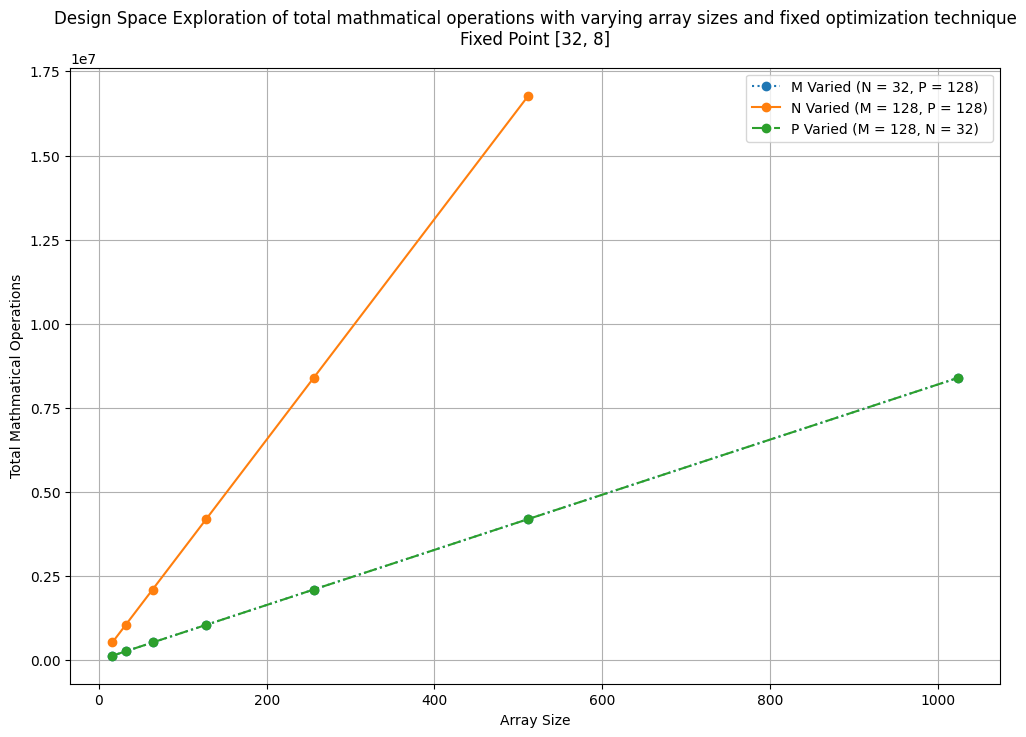

In [42]:
def EstimateOperations(dfResults: pd.DataFrame):
    mulOps: list = [0 for i in range(len(dfResults.index))]
    sumOps: list = [0 for i in range(len(dfResults.index))]
    totalOps: list = [0 for i in range(len(dfResults.index))]
    for i in range(len(dfResults.index)):
        mulOps[i] = dfResults["M"].iloc[i] * dfResults["N"].iloc[i] * dfResults["P"].iloc[i]
        sumOps[i] = dfResults["M"].iloc[i] * dfResults["N"].iloc[i] * dfResults["P"].iloc[i]
        totalOps[i] = mulOps[i] + sumOps[i]

    return mulOps, sumOps, totalOps

mulOps, sumOps, totalOps = EstimateOperations(dfMResult)
dfMResult["MulOps"] = mulOps
dfMResult["SumOps"] = sumOps
dfMResult["TotalOps"] = totalOps

mulOps, sumOps, totalOps = EstimateOperations(dfNResult)
dfNResult["MulOps"] = mulOps
dfNResult["SumOps"] = sumOps
dfNResult["TotalOps"] = totalOps

mulOps, sumOps, totalOps = EstimateOperations(dfPResult)
dfPResult["MulOps"] = mulOps
dfPResult["SumOps"] = sumOps
dfPResult["TotalOps"] = totalOps

fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handle_M, = ax.plot(dfMResult["M"], dfMResult["TotalOps"], marker="o", linestyle=":", label="M Varied (N = 32, P = 128)")
handle_N, = ax.plot(dfNResult["N"], dfNResult["TotalOps"], marker="o", label="N Varied (M = 128, P = 128)")
handle_P, = ax.plot(dfPResult["P"], dfPResult["TotalOps"], marker="o", linestyle="-.", label="P Varied (M = 128, N = 32)")

handles = [handle_M, handle_N, handle_P]
ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Total Mathmatical Operations")
ax.set_title("Design Space Exploration of total mathmatical operations with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

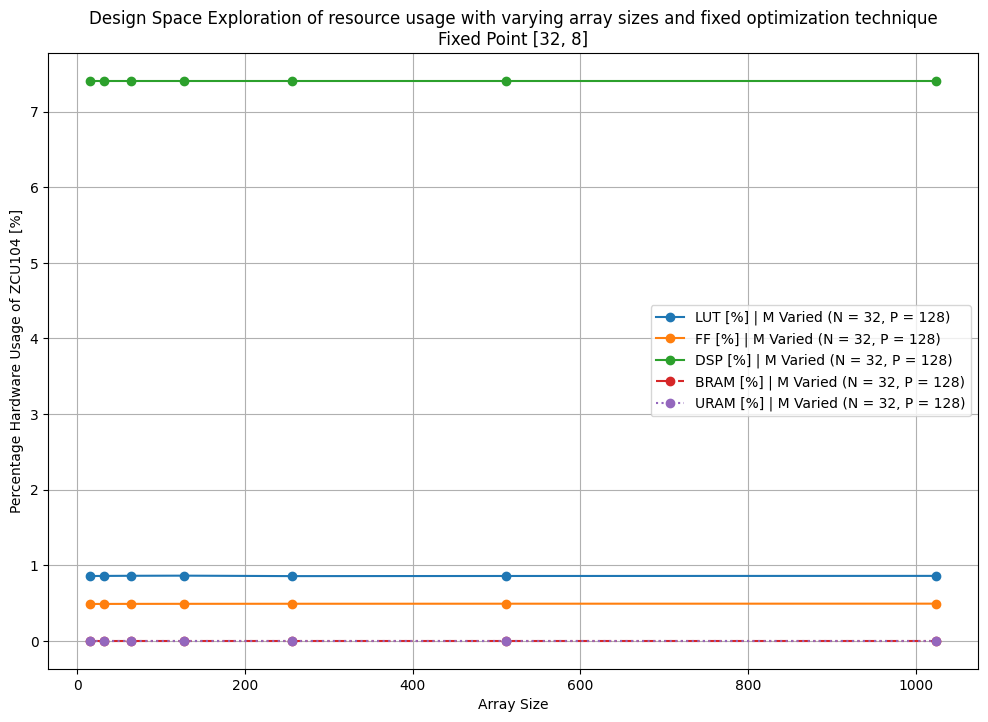

In [43]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handleLUTPct, = ax.plot(dfMResult["M"], dfMResult["LUT%"], marker="o", label="LUT [%] | M Varied (N = 32, P = 128)")
handleFFPct, = ax.plot(dfMResult["M"], dfMResult["FF%"], marker="o", label="FF [%] | M Varied (N = 32, P = 128)")
handleDSPPct, = ax.plot(dfMResult["M"], dfMResult["DSP%"], marker="o", label="DSP [%] | M Varied (N = 32, P = 128)")
handleBRAMPct, = ax.plot(dfMResult["M"], dfMResult["BRAM%"], marker="o", linestyle="-.", label="BRAM [%] | M Varied (N = 32, P = 128)")
handleURAMPct, = ax.plot(dfMResult["M"], dfMResult["URAM%"], marker="o", linestyle=":", label="URAM [%] | M Varied (N = 32, P = 128)")

handles = [handleLUTPct, handleFFPct, handleDSPPct, handleBRAMPct, handleURAMPct]

ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Percentage Hardware Usage of ZCU104 [%]")
ax.set_title("Design Space Exploration of resource usage with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

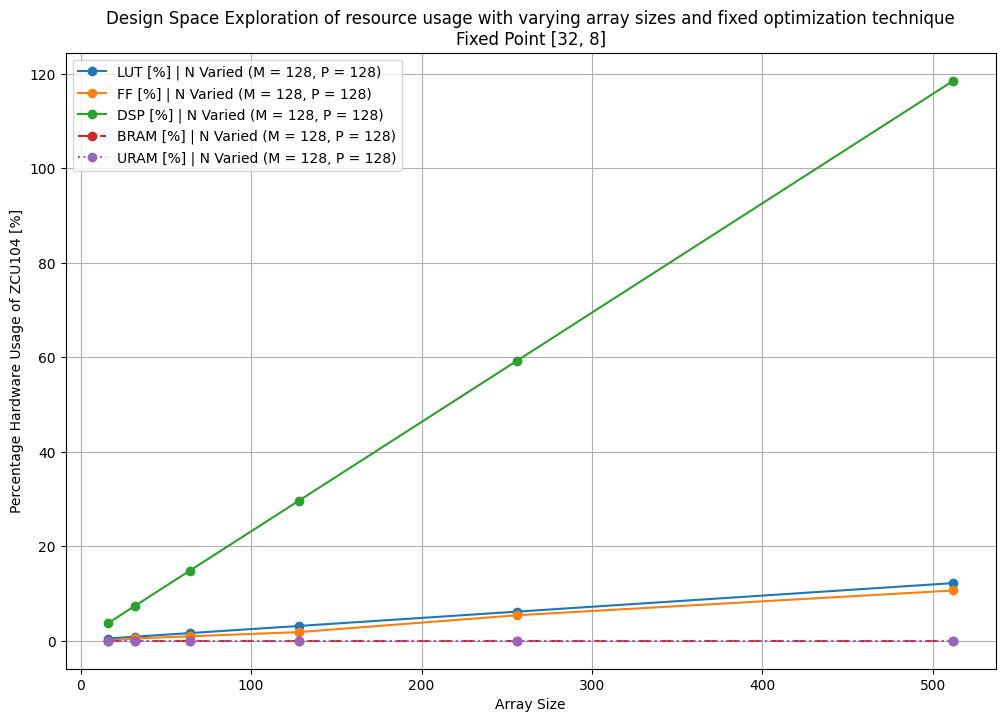

In [45]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handleLUTPct, = ax.plot(dfNResult["N"], dfNResult["LUT%"], marker="o", label="LUT [%] | N Varied (M = 128, P = 128)")
handleFFPct, = ax.plot(dfNResult["N"], dfNResult["FF%"], marker="o", label="FF [%] | N Varied (M = 128, P = 128)")
handleDSPPct, = ax.plot(dfNResult["N"], dfNResult["DSP%"], marker="o", label="DSP [%] | N Varied (M = 128, P = 128)")
handleBRAMPct, = ax.plot(dfNResult["N"], dfNResult["BRAM%"], marker="o", linestyle="-.", label="BRAM [%] | N Varied (M = 128, P = 128)")
handleURAMPct, = ax.plot(dfNResult["N"], dfNResult["URAM%"], marker="o", linestyle=":", label="URAM [%] | N Varied (M = 128, P = 128)")

handles = [handleLUTPct, handleFFPct, handleDSPPct, handleBRAMPct, handleURAMPct]

ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Percentage Hardware Usage of ZCU104 [%]")
ax.set_title("Design Space Exploration of resource usage with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

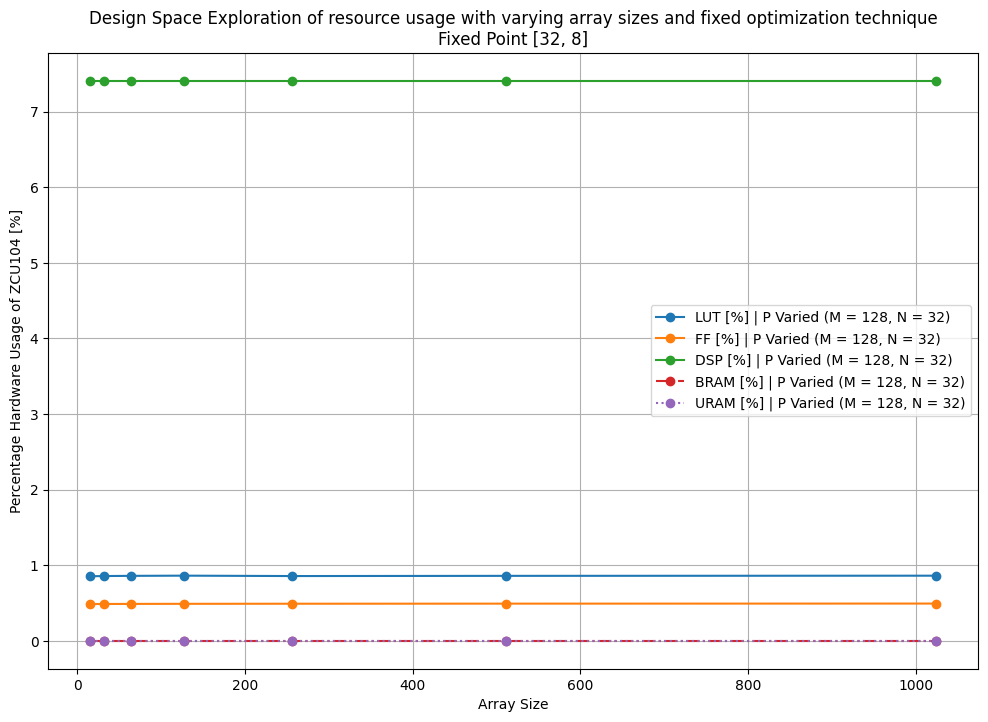

In [51]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handleLUTPct, = ax.plot(dfPResult["P"], dfPResult["LUT%"], marker="o", label="LUT [%] | P Varied (M = 128, N = 32)")
handleFFPct, = ax.plot(dfPResult["P"], dfPResult["FF%"], marker="o", label="FF [%] | P Varied (M = 128, N = 32)")
handleDSPPct, = ax.plot(dfPResult["P"], dfPResult["DSP%"], marker="o", label="DSP [%] | P Varied (M = 128, N = 32)")
handleBRAMPct, = ax.plot(dfPResult["P"], dfPResult["BRAM%"], marker="o", linestyle="-.", label="BRAM [%] | P Varied (M = 128, N = 32)")
handleURAMPct, = ax.plot(dfPResult["P"], dfPResult["URAM%"], marker="o", linestyle=":", label="URAM [%] | P Varied (M = 128, N = 32)")

handles = [handleLUTPct, handleFFPct, handleDSPPct, handleBRAMPct, handleURAMPct]

ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Percentage Hardware Usage of ZCU104 [%]")
ax.set_title("Design Space Exploration of resource usage with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

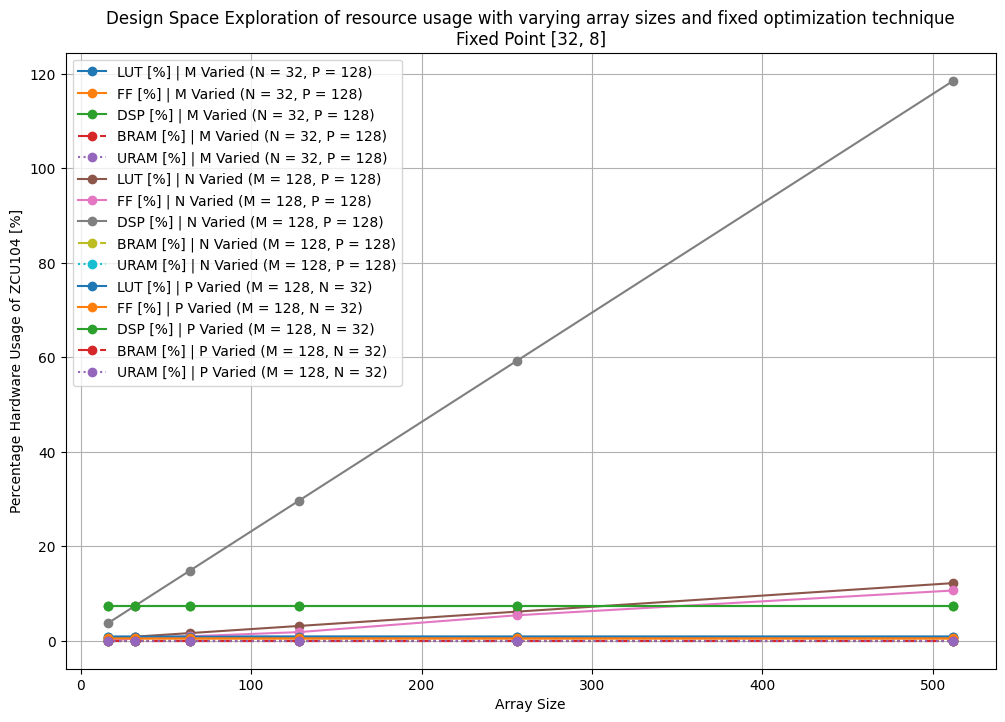

In [50]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handleMLUTPct, = ax.plot(dfMResult["M"].iloc[:-1], dfMResult["LUT%"].iloc[:-1], marker="o", label="LUT [%] | M Varied (N = 32, P = 128)")
handleMFFPct, = ax.plot(dfMResult["M"].iloc[:-1], dfMResult["FF%"].iloc[:-1], marker="o", label="FF [%] | M Varied (N = 32, P = 128)")
handleMDSPPct, = ax.plot(dfMResult["M"].iloc[:-1], dfMResult["DSP%"].iloc[:-1], marker="o", label="DSP [%] | M Varied (N = 32, P = 128)")
handleMBRAMPct, = ax.plot(dfMResult["M"].iloc[:-1], dfMResult["BRAM%"].iloc[:-1], marker="o", linestyle="-.", label="BRAM [%] | M Varied (N = 32, P = 128)")
handleMURAMPct, = ax.plot(dfMResult["M"].iloc[:-1], dfMResult["URAM%"].iloc[:-1], marker="o", linestyle=":", label="URAM [%] | M Varied (N = 32, P = 128)")

handleNLUTPct, = ax.plot(dfNResult["N"], dfNResult["LUT%"], marker="o", label="LUT [%] | N Varied (M = 128, P = 128)")
handleNFFPct, = ax.plot(dfNResult["N"], dfNResult["FF%"], marker="o", label="FF [%] | N Varied (M = 128, P = 128)")
handleNDSPPct, = ax.plot(dfNResult["N"], dfNResult["DSP%"], marker="o", label="DSP [%] | N Varied (M = 128, P = 128)")
handleNBRAMPct, = ax.plot(dfNResult["N"], dfNResult["BRAM%"], marker="o", linestyle="-.", label="BRAM [%] | N Varied (M = 128, P = 128)")
handleNURAMPct, = ax.plot(dfNResult["N"], dfNResult["URAM%"], marker="o", linestyle=":", label="URAM [%] | N Varied (M = 128, P = 128)")

handlePLUTPct, = ax.plot(dfPResult["P"].iloc[:-1], dfPResult["LUT%"].iloc[:-1], marker="o", label="LUT [%] | P Varied (M = 128, N = 32)")
handlePFFPct, = ax.plot(dfPResult["P"].iloc[:-1], dfPResult["FF%"].iloc[:-1], marker="o", label="FF [%] | P Varied (M = 128, N = 32)")
handlePDSPPct, = ax.plot(dfPResult["P"].iloc[:-1], dfPResult["DSP%"].iloc[:-1], marker="o", label="DSP [%] | P Varied (M = 128, N = 32)")
handlePBRAMPct, = ax.plot(dfPResult["P"].iloc[:-1], dfPResult["BRAM%"].iloc[:-1], marker="o", linestyle="-.", label="BRAM [%] | P Varied (M = 128, N = 32)")
handlePURAMPct, = ax.plot(dfPResult["P"].iloc[:-1], dfPResult["URAM%"].iloc[:-1], marker="o", linestyle=":", label="URAM [%] | P Varied (M = 128, N = 32)")

handles = [handleMLUTPct, handleMFFPct, handleMDSPPct, handleMBRAMPct, handleMURAMPct,
           handleNLUTPct, handleNFFPct, handleNDSPPct, handleNBRAMPct, handleNURAMPct,
           handlePLUTPct, handlePFFPct, handlePDSPPct, handlePBRAMPct, handlePURAMPct]

ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Percentage Hardware Usage of ZCU104 [%]")
ax.set_title("Design Space Exploration of resource usage with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

handleLUTPct, = ax.plot(dfPResult["P"], dfPResult["LUT%"], marker="o", label="LUT [%] | P Varied (M = 128, N = 32)")
handleFFPct, = ax.plot(dfPResult["P"], dfPResult["FF%"], marker="o", label="FF [%] | P Varied (M = 128, N = 32)")
handleDSPPct, = ax.plot(dfPResult["P"], dfPResult["DSP%"], marker="o", label="DSP [%] | P Varied (M = 128, N = 32)")
handleBRAMPct, = ax.plot(dfPResult["P"], dfPResult["BRAM%"], marker="o", linestyle="-.", label="BRAM [%] | P Varied (M = 128, N = 32)")
handleURAMPct, = ax.plot(dfPResult["P"], dfPResult["URAM%"], marker="o", linestyle=":", label="URAM [%] | P Varied (M = 128, N = 32)")

handles = [handleLUTPct, handleFFPct, handleDSPPct, handleBRAMPct, handleURAMPct]

ax.legend(handles=handles)

ax.set_xlabel("Array Size")
ax.set_ylabel("Percentage Hardware Usage of ZCU104 [%]")
ax.set_title("Design Space Exploration of resource usage with varying array sizes and fixed optimization technique\nFixed Point [32, 8]")

ax.grid(True)